Calcular o impacto de um veículo passando em um tronco

In [1]:
#importa a biblioteca sympy e confere sua versão

import sympy as sp
sp.__version__

'1.7.1'

In [38]:
#importa a biblioteca matplot para gráficos

import matplotlib.pyplot as plt

In [5]:
# define as variáveis do problema

# massa em kg
m = 200
#constante da mola N/m
k = 1*(10**4)
#resistência do ar N.s/m
c = 500
#velocidade do veiculo em km/h
v = 30
#raio do tronco em metros
r = 0.2
# converte a velocidade para km/s
v = v/3.6
#frequência que o veículo passa pelo tronco
wb = v/r

In [8]:
# cria lista de símbolos, sendo t o tempo e c as constantes
t,c1,c2 = sp.symbols(['t','c1','c2'])

In [10]:
# cria a função que modela o movimento do tronco
y = r*(sp.sin(wb*t))

In [11]:
# calculando as derivadas necessárias para montar a equação de movimento

# para y

dy_t = sp.Derivative(y,t)

# para x
x = sp.Function('x')
dx_t = sp.Derivative(x(t),t)  # x é uma função de t
ddx_t = sp.Derivative(x(t),t,t)  # derivada segunda de x

In [12]:
# equação do movimento geral

eq_movimento = m*(ddx_t) + c*(dx_t-dy_t) + k*(x(t)-y)
eq_movimento

10000*x(t) - 2000.0*sin(41.6666666666667*t) + 500*Derivative(x(t), t) + 200*Derivative(x(t), (t, 2)) - 500*Derivative(0.2*sin(41.6666666666667*t), t)

In [17]:
# solução da equação de movimento para x(t)

x_t = sp.simplify(sp.dsolve(eq_movimento))
x_t

Eq(x(t), (C1*sin(5*sqrt(31)*t/4) + C2*cos(5*sqrt(31)*t/4) - (0.00514782472332082*sin(41.6666666666667*t) + 0.0126738771451805*cos(41.6666666666667*t))*exp(5*t/4))*exp(-5*t/4))

Em tese, o problema está resolvido. Agora é encontrar as constantes dada as condições iniciais, resolvendo as condições iniciais.

In [18]:
# capturando os dados manualmente

print(x_t)

Eq(x(t), (C1*sin(5*sqrt(31)*t/4) + C2*cos(5*sqrt(31)*t/4) - (0.00514782472332082*sin(41.6666666666667*t) + 0.0126738771451805*cos(41.6666666666667*t))*exp(5*t/4))*exp(-5*t/4))


In [22]:
x_t = (c1*sp.sin(5*sp.sqrt(31)*t/4) + c2*sp.cos(5*sp.sqrt(31)*t/4) - (0.00514782472332082*sp.sin(41.6666666666667*t) + 0.0126738771451805*sp.cos(41.6666666666667*t))*sp.exp(5*t/4))*sp.exp(-5*t/4)

In [26]:
# problema de valor inicial
#x(0) = 0 e dx/dt(0) = 0

dx_t = sp.diff(x_t,t)

# armaneza em uma matrix as condições iniciais
X = sp.Matrix([[x_t.subs(t,0)],[dx_t.subs(t,0)]])
X

Matrix([
[                     c2 - 0.0126738771451805],
[5*sqrt(31)*c1/4 - 5*c2/4 - 0.214492696805034]])

In [28]:
# solução da matrix

solucao = sp.solve(X,(c1,c2))
solucao

{c1: 0.0330955160062749, c2: 0.0126738771451805}

In [30]:
#substitui na equação original os valores das constantes
# no que a solução é um dicionário e basta chamar a chave

x_t = x_t.subs(c1,solucao[c1]).subs(c2,solucao[c2])
x_t

(-(0.00514782472332082*sin(41.6666666666667*t) + 0.0126738771451805*cos(41.6666666666667*t))*exp(5*t/4) + 0.0330955160062749*sin(5*sqrt(31)*t/4) + 0.0126738771451805*cos(5*sqrt(31)*t/4))*exp(-5*t/4)

In [32]:
# fazendo o mesmo para as derivadas

dx_t = dx_t.subs(c1,solucao[c1]).subs(c2,solucao[c2])
ddx_t = sp.diff(dx_t, t)

In [34]:
# calculando a força F(t)

f_t = sp.simplify(k*(x_t-y) + c*(dx_t-dy_t))
f_t

-2000.0*sin(41.6666666666667*t) + 212.560859958052*sin(41.6666666666667*t) - 4166.66666666667*cos(41.6666666666667*t) - 233.985119854322*cos(41.6666666666667*t) - 7.92117321573781*sqrt(31)*exp(-5*t/4)*sin(5*sqrt(31)*t/4) + 310.270462558827*exp(-5*t/4)*sin(5*sqrt(31)*t/4) + 20.6846975039218*sqrt(31)*exp(-5*t/4)*cos(5*sqrt(31)*t/4) + 118.817598236067*exp(-5*t/4)*cos(5*sqrt(31)*t/4)

In [44]:
# cria gráfico da forma em função da posição

valores_tempos = [tempo/1000 for tempo in range(1000)]
valores_x = []
valores_f = []

for indice in valores_tempos:

     valores_x.append(x_t.subs(t,indice))
     valores_f.append(f_t.subs(t,indice))

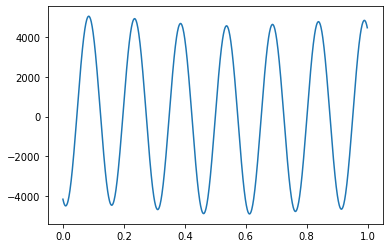

In [45]:
# valores da força no eixo y, valores de tempo (s) no eixo x
# gráfico de fator de carga

plt.plot(valores_tempos,valores_f)